In [1]:
import basis_set_exchange as bse
import scipy as sp
import matplotlib.pyplot as plt
from pyscf import gto,scf
from FcMole import FcM
import copy
import numpy as np

https://pubs.acs.org/doi/abs/10.1021/ed078p391

In [2]:
print(bse.get_basis("pcX-1",fmt="nwchem",elements=["C",7,8,9]))

#----------------------------------------------------------------------
# Basis Set Exchange
# Version v0.8.13
# https://www.basissetexchange.org
#----------------------------------------------------------------------
#   Basis set: pcX-1
# Description: Jensen pcX basis set optimized for core-spectroscopy
#        Role: orbital
#     Version: 1  (Data from Frank Jensen)
#----------------------------------------------------------------------


BASIS "ao basis" PRINT
#BASIS SET: (7s,4p,1d) -> [7s,4p,1d]
C    S
      0.147726E+04           1.0000000
C    S
      0.222361E+03           1.0000000
C    S
      0.505229E+02           1.0000000
C    S
      0.139594E+02           1.0000000
C    S
      0.421475E+01           1.0000000
C    S
      0.653345E+00           1.0000000
C    S
      0.191501E+00           1.0000000
C    P
      0.109571E+02           1.0000000
C    P
      0.232904E+01           1.0000000
C    P
      0.633257E+00           1.0000000
C    P
      0.163150E+00        

In [3]:
bse.get_basis("pc-1",fmt=None,elements=["H"])

{'molssi_bse_schema': {'schema_type': 'complete', 'schema_version': '0.1'},
 'revision_description': 'Data from the Original Basis Set Exchange',
 'revision_date': '2013-01-23',
 'elements': {'1': {'electron_shells': [{'function_type': 'gto',
     'region': '',
     'angular_momentum': [0],
     'exponents': ['0.122520E+02',
      '0.186870E+01',
      '0.418210E+00',
      '0.106100E+00'],
     'coefficients': [['0.228220E-01',
       '0.155640E+00',
       '0.488980E+00',
       '0.000000E+00'],
      ['0.000000E+00', '0.000000E+00', '0.000000E+00', '0.100000E+01']]},
    {'function_type': 'gto',
     'region': '',
     'angular_momentum': [1],
     'exponents': ['0.100000E+01'],
     'coefficients': [['0.100000E+01']]}],
   'references': [{'reference_description': 'pc-1',
     'reference_keys': ['jensen2001a', 'jensen2002a']}]}},
 'version': '0',
 'function_types': ['gto', 'gto_spherical'],
 'names': ['pc-1'],
 'tags': [],
 'family': 'jensen',
 'description': 'pc-1',
 'role': 'orbit

In [4]:
mol=gto.M(atom="He 0 0 0",basis=bse.get_basis("pc-1",fmt="nwchem",elements=["He"]))
#mol=gto.M(atom="He 0 0 0",basis="sto-3g")

In [5]:
mol.basis

'#----------------------------------------------------------------------\n# Basis Set Exchange\n# Version v0.8.13\n# https://www.basissetexchange.org\n#----------------------------------------------------------------------\n#   Basis set: pc-1\n# Description: pc-1\n#        Role: orbital\n#     Version: 0  (Data from the Original Basis Set Exchange)\n#----------------------------------------------------------------------\n\n\nBASIS "ao basis" PRINT\n#BASIS SET: (4s,1p) -> [2s,1p]\nHe    S\n      0.368650E+02           0.130620E-01           0.000000E+00\n      0.558020E+01           0.834910E-01           0.000000E+00\n      0.119170E+01           0.238740E+00           0.000000E+00\n      0.268920E+00           0.000000E+00           0.100000E+01\nHe    P\n      0.145000E+01           0.100000E+01\nEND\n'

In [6]:
mol.nao

5

In [7]:
n_pcx1=gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=["N"]),"N")
n_pcx1

[[0, [2004.67, 1.0]],
 [0, [301.707, 1.0]],
 [0, [68.5611, 1.0]],
 [0, [18.9925, 1.0]],
 [0, [5.76941, 1.0]],
 [0, [0.916175, 1.0]],
 [0, [0.264783, 1.0]],
 [1, [14.9507, 1.0]],
 [1, [3.21784, 1.0]],
 [1, [0.87044, 1.0]],
 [1, [0.218852, 1.0]],
 [2, [0.948683, 1.0]]]

In [8]:
c_pcx1=gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=["C"]),"C")

In [9]:
o_pcx1=gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=["O"]),"O")
f_pcx1=gto.basis.load(bse.get_basis("pcX-1",fmt="nwchem",elements=["F"]),"F")

In [10]:
c=.5
mcn_pcx1=copy.deepcopy(n_pcx1)
mon_pcx1=copy.deepcopy(n_pcx1)

In [11]:
for i in range(len(n_pcx1)):
    mcn_pcx1[i][1][0]=n_pcx1[i][1][0]*(1-c)+c_pcx1[i][1][0]*c
    mon_pcx1[i][1][0]=n_pcx1[i][1][0]*(1-c)+o_pcx1[i][1][0]*c

In [12]:
n_pcx1,mcn_pcx1,c_pcx1

([[0, [2004.67, 1.0]],
  [0, [301.707, 1.0]],
  [0, [68.5611, 1.0]],
  [0, [18.9925, 1.0]],
  [0, [5.76941, 1.0]],
  [0, [0.916175, 1.0]],
  [0, [0.264783, 1.0]],
  [1, [14.9507, 1.0]],
  [1, [3.21784, 1.0]],
  [1, [0.87044, 1.0]],
  [1, [0.218852, 1.0]],
  [2, [0.948683, 1.0]]],
 [[0, [1740.9650000000001, 1.0]],
  [0, [262.034, 1.0]],
  [0, [59.542, 1.0]],
  [0, [16.47595, 1.0]],
  [0, [4.99208, 1.0]],
  [0, [0.7847599999999999, 1.0]],
  [0, [0.228142, 1.0]],
  [1, [12.9539, 1.0]],
  [1, [2.77344, 1.0]],
  [1, [0.7518484999999999, 1.0]],
  [1, [0.19100099999999998, 1.0]],
  [2, [0.8986055, 1.0]]],
 [[0, [1477.26, 1.0]],
  [0, [222.361, 1.0]],
  [0, [50.5229, 1.0]],
  [0, [13.9594, 1.0]],
  [0, [4.21475, 1.0]],
  [0, [0.653345, 1.0]],
  [0, [0.191501, 1.0]],
  [1, [10.9571, 1.0]],
  [1, [2.32904, 1.0]],
  [1, [0.633257, 1.0]],
  [1, [0.16315, 1.0]],
  [2, [0.848528, 1.0]]])

In [13]:
#n_pcx1,m_pcx1,c_pcx1

In [14]:
m1=gto.M(atom="N 0 0 0; N 0 0 2.01",unit="Bohrs",basis={"N":n_pcx1})
m2=gto.M(atom="N1 0 0 0; N2 0 0 2.01",unit="Bohrs",basis={"N1":c_pcx1,"N2":o_pcx1})
m3=gto.M(atom="N1 0 0 0; N2 0 0 2.01",unit="Bohrs",basis={"N1":mcn_pcx1,"N2":mcn_pcx1})

In [15]:
mf1=scf.RHF(m1)
mf1.scf()
mf2=scf.RHF(m2)
mf2.scf()
mf3=scf.RHF(m3)
mf3.scf()

converged SCF energy = -108.917141764211
converged SCF energy = -108.891229528654
converged SCF energy = -108.921960018663


-108.92196001866331

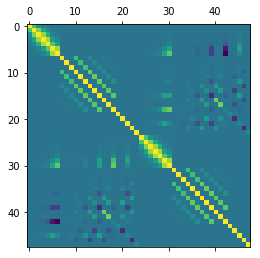

In [16]:
plt.matshow(mf1.get_ovlp())

In [17]:
np.diag(mf1.get_ovlp())

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
m_pcx1=copy.deepcopy(n_pcx1)
for c in np.linspace(.1,.9,9):
    for i in range(len(m_pcx1)):
        m_pcx1[i][1][0]=n_pcx1[i][1][0]*(1-c)+c_pcx1[i][1][0]*c
    m3=gto.M(atom="N1 0 0 0; N2 0 0 2.01",unit="Bohrs",basis={"N1":m_pcx1,"N2":m_pcx1})
    scf.RHF(m3).scf()

converged SCF energy = -108.919551456022
converged SCF energy = -108.921242815083
converged SCF energy = -108.922210799809
converged SCF energy = -108.922451113879
converged SCF energy = -108.921960018663
converged SCF energy = -108.92073395322
converged SCF energy = -108.918768843465
converged SCF energy = -108.916058929824
converged SCF energy = -108.912594883305


In [19]:
for c in np.linspace(.1,.9,9):
    for i in range(len(n_pcx1)):
        m_pcx1[i][1][0]=n_pcx1[i][1][0]*(1-c)+o_pcx1[i][1][0]*c
    m3=gto.M(atom="N1 0 0 0; N2 0 0 2.01",unit="Bohrs",basis={"N1":m_pcx1,"N2":m_pcx1})
    scf.RHF(m3).scf()

converged SCF energy = -108.913333059415
converged SCF energy = -108.908607049672
converged SCF energy = -108.902978787098
converged SCF energy = -108.896464653334
converged SCF energy = -108.889082216076
converged SCF energy = -108.880850054619
converged SCF energy = -108.871787565705
converged SCF energy = -108.861914758457
converged SCF energy = -108.851252045945


In [20]:
(c_pcx1[0][1][0],n_pcx1[0][1][0],o_pcx1[0][1][0],f_pcx1[0][1][0])

(1477.26, 2004.67, 2610.67, 3297.48)

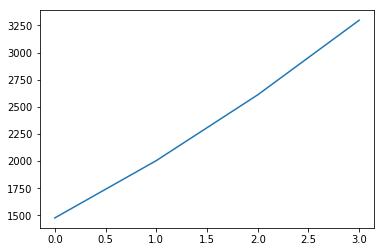

In [21]:
plt.plot([c_pcx1[0][1][0],n_pcx1[0][1][0],o_pcx1[0][1][0],f_pcx1[0][1][0]])

In [22]:
from scipy.interpolate import interp1d

In [23]:
ic=interp1d(np.asarray([6,7,8,9]),np.asarray([c_pcx1[0][1][0],n_pcx1[0][1][0],o_pcx1[0][1][0],f_pcx1[0][1][0]]),kind="cubic")

In [24]:
ic(8.0001)-ic(8),ic(7.9999)-ic(8)

(0.06460390405027283, -0.06460309595013314)

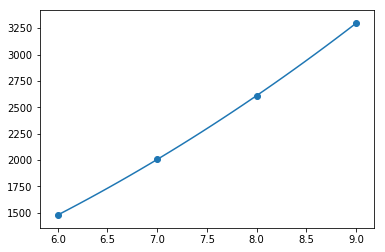

In [25]:
lsx=np.linspace(6,9,30)
plt.plot(lsx,ic(lsx))
plt.scatter(np.asarray([6,7,8,9]),np.asarray([c_pcx1[0][1][0],n_pcx1[0][1][0],o_pcx1[0][1][0],f_pcx1[0][1][0]]))

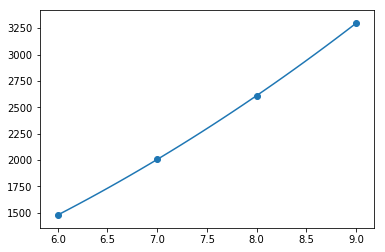

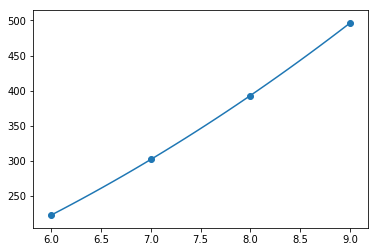

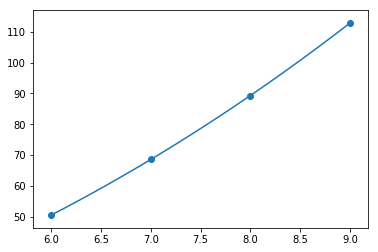

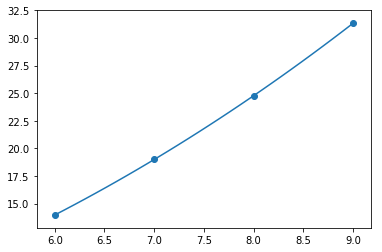

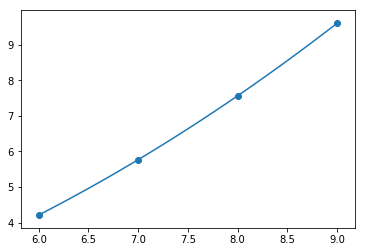

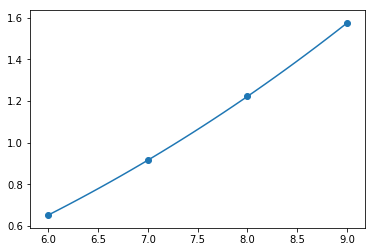

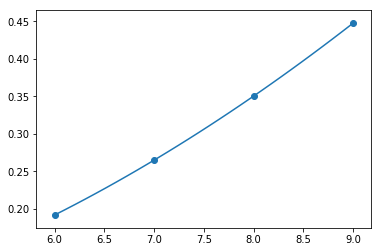

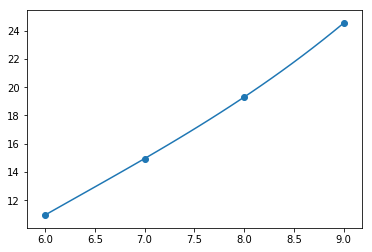

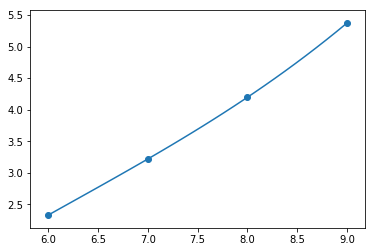

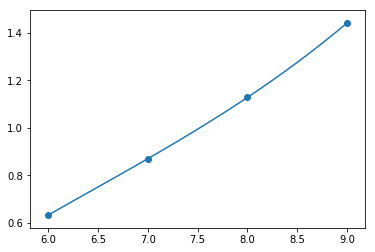

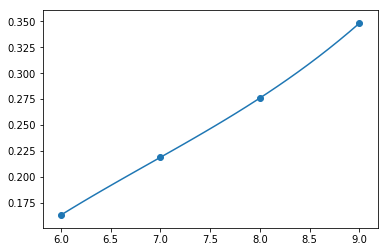

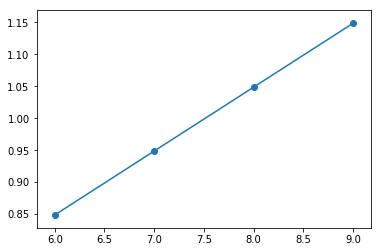

In [26]:
ics=[]
for i in range(len(n_pcx1)):
    ic=interp1d(np.asarray([6,7,8,9]),np.asarray([c_pcx1[i][1][0],n_pcx1[i][1][0],o_pcx1[i][1][0],f_pcx1[i][1][0]]),kind="cubic")
    ics.append(ic)
    plt.plot(lsx,ic(lsx))
    plt.scatter(np.asarray([6,7,8,9]),np.asarray([c_pcx1[i][1][0],n_pcx1[i][1][0],o_pcx1[i][1][0],f_pcx1[i][1][0]]))
    plt.show()

In [27]:
def bs(Z):
    for i in range(len(ics)):
        print(ics[i](Z))

In [28]:
bs(7.),n_pcx1

2004.67
301.707
68.5611
18.9925
5.76941
0.916175
0.264783
14.950699999999998
3.21784
0.87044
0.21885199999999996
0.948683


(None,
 [[0, [2004.67, 1.0]],
  [0, [301.707, 1.0]],
  [0, [68.5611, 1.0]],
  [0, [18.9925, 1.0]],
  [0, [5.76941, 1.0]],
  [0, [0.916175, 1.0]],
  [0, [0.264783, 1.0]],
  [1, [14.9507, 1.0]],
  [1, [3.21784, 1.0]],
  [1, [0.87044, 1.0]],
  [1, [0.218852, 1.0]],
  [2, [0.948683, 1.0]]])

In [29]:
mf1.make_rdm1()

array([[ 4.34428124e-05,  3.24692254e-04,  1.48391994e-03, ...,
        -1.09418687e-04, -2.87143782e-18, -1.87153445e-20],
       [ 3.24692254e-04,  2.42677705e-03,  1.10909844e-02, ...,
        -8.16648617e-04, -2.27776039e-17, -1.44705909e-19],
       [ 1.48391994e-03,  1.10909844e-02,  5.06963375e-02, ...,
        -3.86473355e-03, -9.90958318e-17, -6.78562730e-19],
       ...,
       [-1.09418687e-04, -8.16648617e-04, -3.86473355e-03, ...,
         3.95535382e-03,  7.99070765e-16, -2.22715989e-18],
       [-2.87143782e-18, -2.27776039e-17, -9.90958318e-17, ...,
         7.99070765e-16,  4.46919539e-03,  6.16385896e-17],
       [-1.87153445e-20, -1.44705909e-19, -6.78562730e-19, ...,
        -2.22715989e-18,  6.16385896e-17,  9.53980821e-31]])

## Mixing requirement
1) For integer charge return exact basis of the element <br>
2) Should be continuos <br>
3) should have continuos arbitrary order derivatives <br>


In [30]:
#bs(Z)-> P(Z),->P(AO-target)

# Contracted Gaussians

In [31]:
gto.basis.load('sto-3g', 'C'),\
gto.basis.load('sto-3g', 'N')

([[0,
   [71.616837, 0.15432897],
   [13.045096, 0.53532814],
   [3.5305122, 0.44463454]],
  [0,
   [2.9412494, -0.09996723],
   [0.6834831, 0.39951283],
   [0.2222899, 0.70011547]],
  [1,
   [2.9412494, 0.15591627],
   [0.6834831, 0.60768372],
   [0.2222899, 0.39195739]]],
 [[0,
   [99.106169, 0.15432897],
   [18.052312, 0.53532814],
   [4.8856602, 0.44463454]],
  [0,
   [3.7804559, -0.09996723],
   [0.8784966, 0.39951283],
   [0.2857144, 0.70011547]],
  [1,
   [3.7804559, 0.15591627],
   [0.8784966, 0.60768372],
   [0.2857144, 0.39195739]]])

In [32]:
# the coefficients are equal, hope for some result, misleading??

In [33]:
m1=gto.M(atom="N 0 0 0; N 0 0 2.01",unit="Bohrs",basis={"N":"sto-3g"})
m2=gto.M(atom="N1 0 0 0; N2 0 0 2.01",unit="Bohrs",basis={"N1":gto.basis.load('sto-3g', 'C'),\
                                                       "N2":gto.basis.load('sto-3g', 'O')})
mf1=scf.RHF(m1)
mf1.scf()
mf2=scf.RHF(m2)
mf2.scf()

converged SCF energy = -107.481313549373
converged SCF energy = -105.429879166583


-105.42987916658295

In [34]:
b_sto=gto.basis.load('sto-3g', 'B')
c_sto=gto.basis.load('sto-3g', 'C')
n_sto=gto.basis.load('sto-3g', 'N')
o_sto=gto.basis.load('sto-3g', 'O')
f_sto=gto.basis.load('sto-3g', 'F')

In [35]:
for i in n_sto:
    for j in i[1:]:
        print(j[0])

99.106169
18.052312
4.8856602
3.7804559
0.8784966
0.2857144
3.7804559
0.8784966
0.2857144


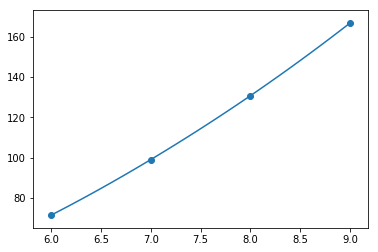

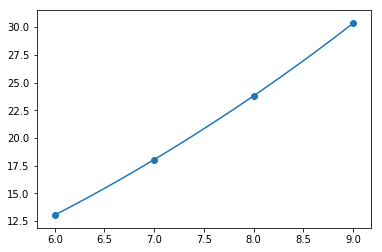

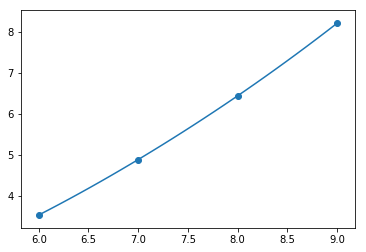

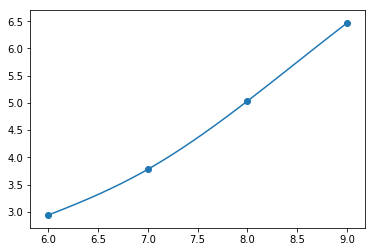

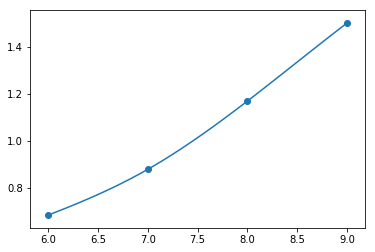

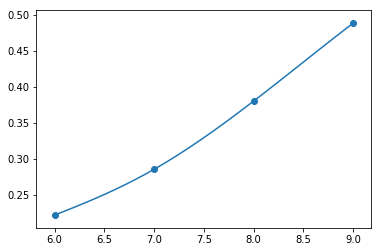

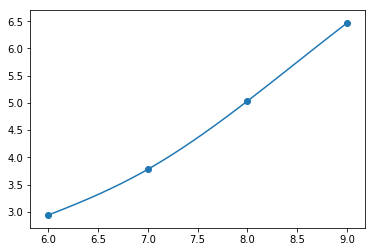

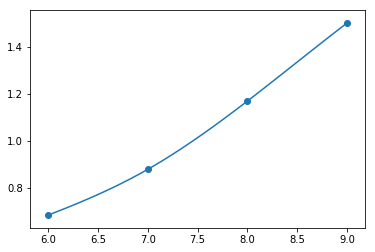

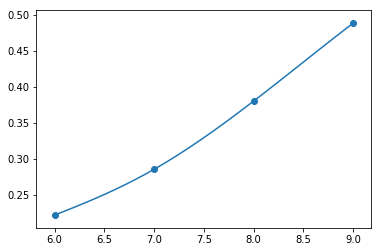

In [41]:
ics_sto=[]
for i in range(len(n_sto)):
    icp=[]
    for j in range(1,len(n_sto[i])):
        ic=interp1d(np.asarray([5,6,7,8,9]),np.asarray([b_sto[i][j][0],c_sto[i][j][0],n_sto[i][j][0],o_sto[i][j][0],f_sto[i][j][0]]),kind="cubic")
        icp.append(ic)
        plt.plot(lsx,ic(lsx))
        plt.scatter(np.asarray([6,7,8,9]),np.asarray([c_sto[i][j][0],n_sto[i][j][0],o_sto[i][j][0],f_sto[i][j][0]]))
        plt.show()
    ics_sto.append(icp)

In [42]:
ics_sto

[[<scipy.interpolate.interpolate.interp1d at 0x7fd4e94c2278>,

In [58]:
def sto(z):
    r_sto=copy.deepcopy(n_sto)
    for i in range(len(r_sto)):
        for j in range(1,len(r_sto[i])):
            r_sto[i][j][0]=float(ics_sto[i][j-1](z))
    return r_sto

In [59]:
sto(7)

[[0,
  [99.10616899999998, 0.15432897],
  [18.052312, 0.53532814],
  [4.8856602, 0.44463454]],
 [0,
  [3.7804559, -0.09996723],
  [0.8784966000000001, 0.39951283],
  [0.2857144, 0.70011547]],
 [1,
  [3.7804559, 0.15591627],
  [0.8784966000000001, 0.60768372],
  [0.2857144, 0.39195739]]]

In [158]:
def E(l):
    mol_l=FcM(fcs=[-l,l],atom="N1 0 0 0; N2 0 0 2.14",unit="Bohrs",basis={"N1":sto(7-l),"N2":sto(7+l)},verbose=1)
    mf_l=scf.RHF(mol_l)
    e=mf_l.scf(dm0=dm0_nn)
    return e

In [159]:
def E_old(l):
    mol_l=FcM(fcs=[-l,l],atom="N 0 0 0; N 0 0 2.14",unit="Bohrs",basis="sto-3g",verbose=1)
    mf_l=scf.RHF(mol_l)
    e=mf_l.scf(dm0=dm0_nn)
    return e

In [197]:
mf_NN=scf.RHF(gto.M(atom="N 0 0 0; N 0 0 2.14",unit="Bohrs",basis="sto-3g"))
e_0=mf_NN.scf()
dm0_nn=mf_NN.make_rdm1()

converged SCF energy = -107.500647520058


In [198]:
e_T=scf.RHF(gto.M(atom="C 0 0 0; O 0 0 2.14",unit="Bohrs")).scf()

converged SCF energy = -111.224958315392


In [156]:
e_T_R=E_old(1)

[2. 2. 2. 2. 2. 2. 2. 0. 0. 0.]


In [160]:
E(0)

-107.50064752005753

In [161]:
#finite difference coefficients
fd1=np.asarray([1/12,-2/3 ,0,2/3,-1/12])
fd2=np.asarray([-1/12,4/3,-5/2,4/3,-1/12])
fd3=np.asarray([-1/2,1,0,-1,1/2])
fd4=np.asarray([1,-4,6,-4,1])

In [173]:
fds=[fd1,fd2,fd3,fd4]


In [213]:
dl=.05
Es=np.asarray([E(-2*dl),E(-dl),e_0,E(dl),E(2*dl)])
Es_old=np.asarray([E_old(-2*dl),E_old(-dl),e_0,E_old(dl),E_old(2*dl)])

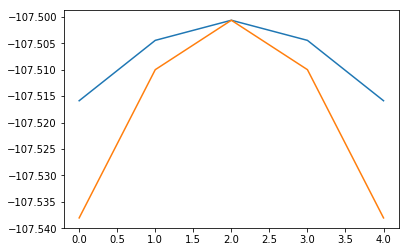

In [214]:
plt.plot(Es_old)
plt.plot(Es)

In [220]:
apdft=[e_0]
inc=[]
for i in range(4):
    inc.append(fds[i].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+fds[i].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1) )

In [221]:
apdft,e_T

([-107.50064752005758,
  -107.50064752005827,
  -111.24058109103864,
  -111.24058109096285,
  -111.18689119813494],
 -111.22495831539152)

In [222]:
apdft_old=[e_0]
inc_old=[]
for i in range(4):
    inc_old.append(fds[i].dot(np.asarray(Es_old))/dl**(i+1)/np.math.factorial(i+1))
    apdft_old.append(apdft_old[i]+fds[i].dot(np.asarray(Es_old))/dl**(i+1)/np.math.factorial(i+1) )

In [223]:
apdft_old

[-107.50064752005758,
 -107.50064752005808,
 -109.02343144750755,
 -109.0234314474128,
 -109.00493770976634]

In [224]:
e_T_R

-109.00556851340605

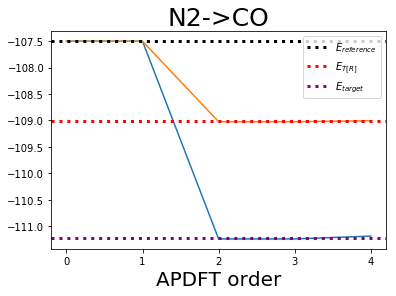

In [257]:
plt.plot([0,1,2,3,4],apdft)
plt.plot([0,1,2,3,4],apdft_old)
plt.title("N2->CO",size=25)
plt.xticks([0,1,2,3,4])
plt.xlabel("APDFT order",size=20)
plt.axhline(e_0,color="black",ls=":",lw=3,label="$E_{reference}$")
plt.axhline(e_T_R,color="red",ls=":",lw=3,label="$E_{T[R]}$")
plt.axhline(e_T,color="purple",ls=":",lw=3,label="$E_{target}$")
plt.legend()
plt.savefig("sto-3G.png")